In [246]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report)

# ___Multi-Class Evaluation___
---------------

In [180]:
# Multi class evaluation is a straightforward extension of the binary use case.
# It will give a collection of true vs predicted binary outcomes -> one per class.
# Confusion matrices are also possible.
# Classification reports.

# Overall metrics are averages across classes.
# There are multiple ways to average multi-class results.
# The support for each class is important to consider, e.g. in the case of imbalanced classes.

# There is also multi-label classification, where each instance may have multiple labels
# e.g. a web page may be labelled -> technology, news and sensational.
# This type is not covered here.

In [181]:
# Multi-class confusion matrix is a straightforward extension of the binary classifier's 2x2 confusion matrix.

In [182]:
digits = load_digits()
train_x, test_x, train_y, test_y = train_test_split(digits.data, digits.target)

In [183]:
logReg = LogisticRegression(C = 0.5, max_iter = 10000).fit(train_x, train_y)

In [184]:
logReg.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [185]:
logReg.score(test_x, test_y)

0.94

In [186]:
preds = logReg.predict(test_x)

In [187]:
cfmat = confusion_matrix(test_y, preds)

In [188]:
np.bincount(test_y)

array([43, 39, 47, 48, 43, 47, 45, 46, 47, 45], dtype=int64)

In [189]:
cfmat

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 44,  0,  0,  0,  0,  2,  1],
       [ 0,  1,  0,  0, 41,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 44,  0,  1],
       [ 0,  1,  2,  1,  0,  4,  0,  0, 38,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  1,  1, 41]], dtype=int64)

In [190]:
cfmat[5, :]

array([ 0,  0,  1,  0,  0, 45,  0,  0,  0,  1], dtype=int64)

In [191]:
np.argmax(cfmat[5, :])

5

In [192]:
cfmat.shape

(10, 10)

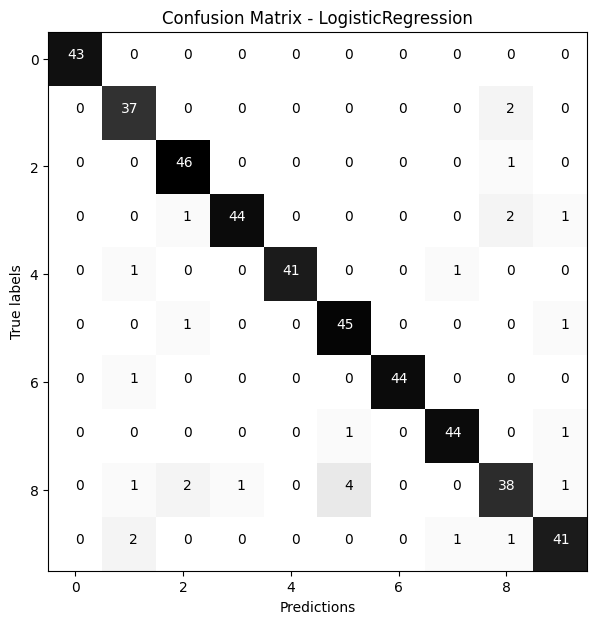

In [208]:
fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.imshow(cfmat, cmap = "binary")

for column in range(0, 10):
    for row in range(0, 10):
        if column == row:
            axes.text(y = row, x = column - .15, s = cfmat[row, column], color = "white")
        else:
            axes.text(y = row, x = column, s = cfmat[row, column])
axes.set_xlabel("Predictions")
axes.set_ylabel("True labels")
axes.set_title("Confusion Matrix - LogisticRegression")
plt.show()

In [194]:
# All true positives are aligned in the diagonal axis.
# All misclassifications are off the diagonal.

In [217]:
def plot_confusion_matrix(confusion_matrix: npt.NDArray[np.int64], model: str) -> None:
    fig, axes = plt.subplots()
    fig.set_size_inches(7, 7)
    axes.imshow(confusion_matrix, cmap = "binary")
    
    for column in range(0, confusion_matrix.shape[0]):
        for row in range(0, confusion_matrix.shape[0]):
            if row == np.argmax(confusion_matrix[column, :]):
                # print(row)
                axes.text(y = row, x = column - .15, s = confusion_matrix[row, column], color = "white")
            else:
                axes.text(y = row, x = column, s = confusion_matrix[row, column], color = "black")

    axes.set_xlabel("Predictions")
    axes.set_ylabel("True labels")
    axes.set_title(f"Confusion Matrix - {model}")
    plt.show()

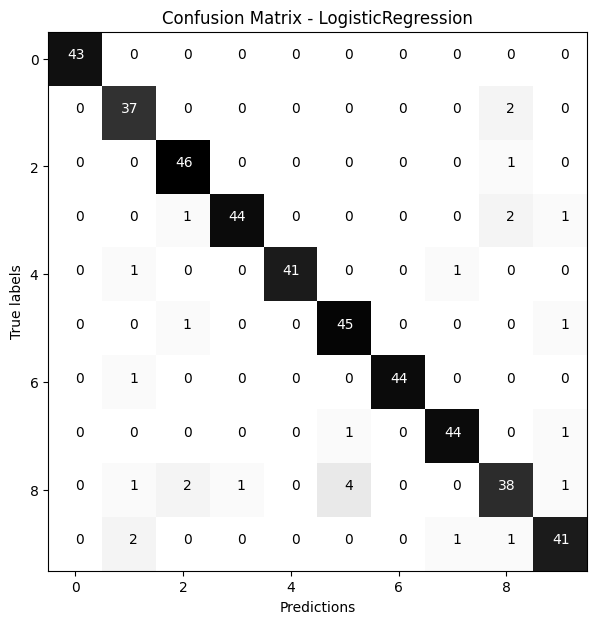

In [219]:
plot_confusion_matrix(confusion_matrix = cfmat, model = "LogisticRegression")

In [220]:
svcLin = SVC(C = 0.05, kernel = "linear").fit(train_x, train_y)
preds = svcLin.predict(test_x)
svcLin_cfmat = confusion_matrix(test_y, preds)

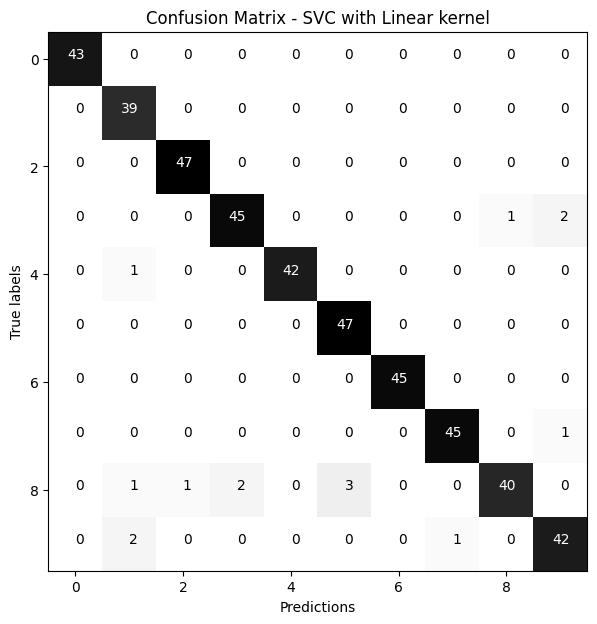

In [221]:
plot_confusion_matrix(svcLin_cfmat, "SVC with Linear kernel")

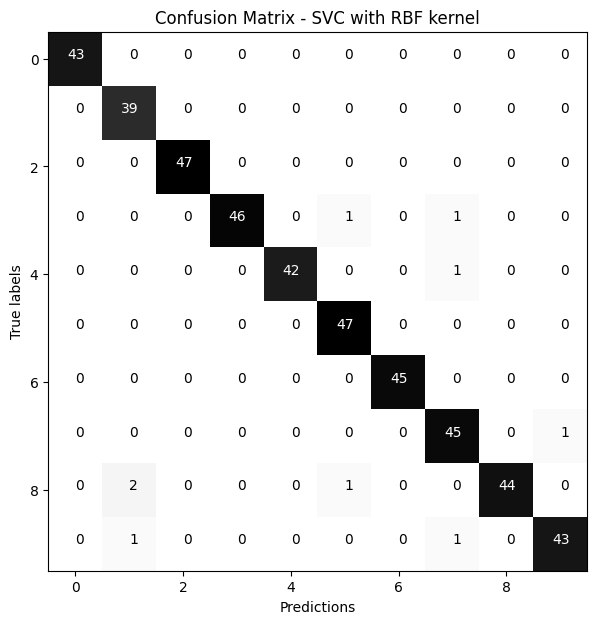

In [247]:
svcLin = SVC(C = 0.5, kernel = "rbf").fit(train_x, train_y)
preds = svcLin.predict(test_x)
svcLin_cfmat = confusion_matrix(test_y, preds)
plot_confusion_matrix(svcLin_cfmat, "SVC with RBF kernel")

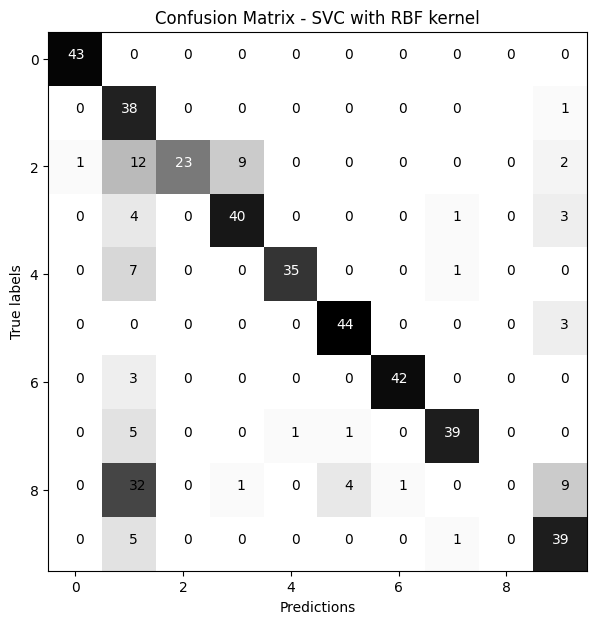

In [244]:
svcLin = SVC(C = 0.02125, kernel = "rbf").fit(train_x, train_y)
preds = svcLin.predict(test_x)
svcLin_cfmat = confusion_matrix(test_y, preds)
plot_confusion_matrix(svcLin_cfmat, "SVC with RBF kernel")

In [245]:
# The above is a really bad classifier.
# Confusion matrices like this can reveal information on where and how these misclassifications occur!

# Many 8s and 2s are misclassified as 1 by the classifier.
# The classifier did not predict any 8s.
# 9 8s were classified as 9s by the classifier.

# Some classes may be more prone to certain types of errors.

In [251]:
print(classification_report(test_y, svcLin.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      1.00      0.96        39
           2       1.00      1.00      1.00        47
           3       1.00      0.96      0.98        48
           4       1.00      0.98      0.99        43
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        45
           7       0.94      0.98      0.96        46
           8       1.00      0.94      0.97        47
           9       0.98      0.96      0.97        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



## ___Micro vs Macro Averaging___
----------------